In [8]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
from keras import callbacks
import time
import datetime
import math 
from keras import models
import keras

In [9]:
model = models.Sequential()
model.add(Convolution2D(16,(3,3),input_shape=(250,250, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

train_data_path = './Train/'
validation_data_path = './Test/'

log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_generator = train.flow_from_directory(train_data_path,target_size=(250,250),
                                           batch_size = 1, class_mode='categorical')
validation_generator = test.flow_from_directory(validation_data_path,target_size=(250,250),
                                           batch_size = 1, class_mode='categorical')
num_class = validation_generator.num_classes
labels = train_generator.class_indices.keys()
model.summary()


Found 500 images belonging to 5 classes.
Found 195 images belonging to 5 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 82, 82, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 19, 19, 64)        0         
______________________________________

In [10]:
start=datetime.datetime.now()
history=model.fit(x=train_generator,epochs=50,validation_data=validation_generator,steps_per_epoch = 50,
          validation_steps=len(validation_generator))

target_dir = './models/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')
loss, acc = model.evaluate(validation_generator,steps=len(validation_generator),verbose=0)
print('Accuracy on training data: {:.4f}% \nLoss on training data: {:.4f}'.format(acc*100,loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/50
50/50 [==============================] - 14s 279ms/step - loss: 1.7678 - acc: 0.1000 - val_loss: 1.7897 - val_acc: 0.1949
Epoch 2/50
50/50 [==============================] - 10s 208ms/step - loss: 1.6779 - acc: 0.1800 - val_loss: 1.5587 - val_acc: 0.5231
Epoch 3/50
50/50 [==============================] - 9s 182ms/step - loss: 1.5243 - acc: 0.3200 - val_loss: 1.5278 - val_acc: 0.2769
Epoch 4/50
50/50 [==============================] - 9s 184ms/step - loss: 1.5442 - acc: 0.3200 - val_loss: 1.4176 - val_acc: 0.3949
Epoch 5/50
50/50 [==============================] - 9s 186ms/step - loss: 1.4340 - acc: 0.4800 - val_loss: 1.3014 - val_acc: 0.6205
Epoch 6/50
50/50 [==============================] - 9s 173ms/step - loss: 1.3839 - acc: 0.4200 - val_loss: 1.1917 - val_acc: 0.7590
Epoch 7/50
50/50 [==============================] - 9s 179ms/step - loss: 1.1901 - acc: 0.5200 - val_loss: 1.1912 - val_acc: 0.4667
Epoch 8/50
50/50 [==============================] - 9s 176ms/step - loss: 

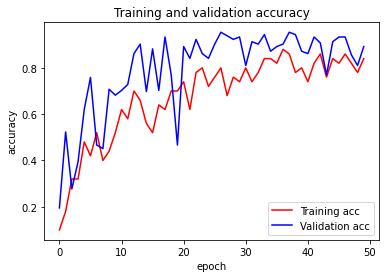

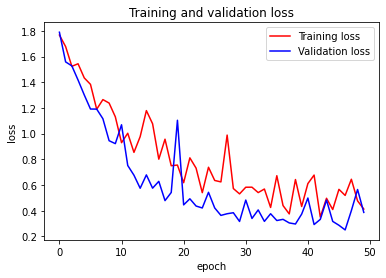

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

[0]
0.9996613
